# Summary
- Analysis of fine-tuned models

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
from ipywidgets import FloatSlider, interactive
import sys
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key

In [2]:
# loading in them all made my machine run out of memory
method_l = [
     "maxcorr", 
     "mincorr", 
     "maxlinreg", 
     "minlinreg", 
    "cca", 
    "lincka", 
    # "rbfcka",
]

In [3]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/belinkov/contextual-corr-analysis/repr_fine_results1_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["cca"]["corrs"]]
network_l = sorted(network_l, key=network_sort_key)

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["cca"]["corrs"][network].values()))) # god this is a hack

In [4]:
network_l

['bert_base_uncased-ptb_pos_dev.hdf5_0',
 'bert_base_uncased-ptb_pos_dev.hdf5_1',
 'bert_base_uncased-ptb_pos_dev.hdf5_2',
 'bert_base_uncased-ptb_pos_dev.hdf5_3',
 'bert_base_uncased-ptb_pos_dev.hdf5_4',
 'bert_base_uncased-ptb_pos_dev.hdf5_5',
 'bert_base_uncased-ptb_pos_dev.hdf5_6',
 'bert_base_uncased-ptb_pos_dev.hdf5_7',
 'bert_base_uncased-ptb_pos_dev.hdf5_8',
 'bert_base_uncased-ptb_pos_dev.hdf5_9',
 'bert_base_uncased-ptb_pos_dev.hdf5_10',
 'bert_base_uncased-ptb_pos_dev.hdf5_11',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_0',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_1',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_2',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_3',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_4',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_5',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_6',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_7',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_8',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_9',
 'bert_base_uncased-ptb_pos_dev_mnli.hdf5_10',

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [5]:
rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}

In [6]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [7]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [8]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

bert_base_uncased-ptb_pos_dev.hdf5_0
           maxlinreg  minlinreg   maxcorr   mincorr
maxlinreg   1.000000   0.313669  0.835308  0.195996
minlinreg   0.313669   1.000000  0.338987  0.413221
maxcorr     0.835308   0.338987  1.000000  0.214047
mincorr     0.195996   0.413221  0.214047  1.000000
bert_base_uncased-ptb_pos_dev.hdf5_1
           maxlinreg  minlinreg   maxcorr   mincorr
maxlinreg   1.000000   0.154694  0.831154 -0.150774
minlinreg   0.154694   1.000000  0.070034  0.421783
maxcorr     0.831154   0.070034  1.000000 -0.177983
mincorr    -0.150774   0.421783 -0.177983  1.000000
bert_base_uncased-ptb_pos_dev.hdf5_2
           maxlinreg  minlinreg   maxcorr   mincorr
maxlinreg   1.000000   0.225499  0.932017 -0.158037
minlinreg   0.225499   1.000000  0.182813  0.404584
maxcorr     0.932017   0.182813  1.000000 -0.161110
mincorr    -0.158037   0.404584 -0.161110  1.000000
bert_base_uncased-ptb_pos_dev.hdf5_3
           maxlinreg  minlinreg   maxcorr   mincorr
maxlinreg   1.000000

### Distributions

In [9]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



bert_base_uncased-ptb_pos_dev.hdf5_0:

maxlinreg

maxcounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_0    768
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.313684  0.271137
min  0.313684  1.000000  0.654566
med  0.271137  0.654566  1.000000

minlinreg

maxcounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_0    768
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.313684  0.271137
min  0.313684  1.000000  0.654566
med  0.271137  0.654566  1.000000

maxcorr

maxcounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_0    762
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0        5
bert_base_uncased-ptb_pos_dev_qnli.hdf5_0       1
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.214055  0.090236


          max       min       med
max  1.000000  0.032605  0.974905
min  0.032605  1.000000  0.020152
med  0.974905  0.020152  1.000000

mincorr

maxcounts
bert_base_uncased-ptb_pos_dev.hdf5_4          569
bert_base_uncased-ptb_pos_dev.hdf5_6          140
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_5     58
bert_base_uncased-ptb_pos_dev_qqp.hdf5_5        1
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    766
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_10      2
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.032605  0.974905
min  0.032605  1.000000  0.020152
med  0.974905  0.020152  1.000000


bert_base_uncased-ptb_pos_dev.hdf5_6:

maxlinreg

maxcounts
bert_base_uncased-ptb_pos_dev.hdf5_7    768
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    767
bert_base_uncased-ptb_pos_dev_mnli.hdf5_0        1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.667757  0.977794
min  0.667757  1.000000  0.7

          max       min       med
max  1.000000  0.128312  0.755921
min  0.128312  1.000000  0.088659
med  0.755921  0.088659  1.000000

mincorr

maxcounts
bert_base_uncased-ptb_pos_dev.hdf5_10    768
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    761
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_10      4
bert_base_uncased-ptb_pos_dev_mnli.hdf5_0        1
bert_base_uncased-ptb_pos_dev_mnli.hdf5_11       1
bert_base_uncased-ptb_pos_dev_qnli.hdf5_0        1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.128312  0.755921
min  0.128312  1.000000  0.088659
med  0.755921  0.088659  1.000000


bert_base_uncased-ptb_pos_dev_mnli.hdf5_0:

maxlinreg

maxcounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_0    326
bert_base_uncased-ptb_pos_dev.hdf5_0          286
bert_base_uncased-ptb_pos_dev_qnli.hdf5_0      83
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0       73
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    768
dtype: int64

c

bert_base_uncased-ptb_pos_dev_mnli.hdf5_4    579
bert_base_uncased-ptb_pos_dev_mnli.hdf5_6    189
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    764
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_10      2
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0         1
bert_base_uncased-ptb_pos_dev.hdf5_0             1
dtype: int64

corr_df_pctl
         max       min       med
max  1.00000 -0.089860  0.947000
min -0.08986  1.000000 -0.116526
med  0.94700 -0.116526  1.000000

mincorr

maxcounts
bert_base_uncased-ptb_pos_dev_mnli.hdf5_4    579
bert_base_uncased-ptb_pos_dev_mnli.hdf5_6    189
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    764
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_10      2
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0         1
bert_base_uncased-ptb_pos_dev.hdf5_0             1
dtype: int64

corr_df_pctl
         max       min       med
max  1.00000 -0.089860  0.947000
min -0.08986  1.000000 -0.116526
med  0.94700 -0.116526  1.000000


bert_bas

          max       min       med
max  1.000000  0.048820  0.735793
min  0.048820  1.000000  0.022505
med  0.735793  0.022505  1.000000


bert_base_uncased-ptb_pos_dev_mnli.hdf5_9:

maxlinreg

maxcounts
bert_base_uncased-ptb_pos_dev_mnli.hdf5_10    768
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    245
bert_base_uncased-ptb_pos_dev_qnli.hdf5_0      190
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0       160
bert_base_uncased-ptb_pos_dev_mnli.hdf5_0      158
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_0      15
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.547616  0.668717
min  0.547616  1.000000  0.847902
med  0.668717  0.847902  1.000000

minlinreg

maxcounts
bert_base_uncased-ptb_pos_dev_mnli.hdf5_10    768
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    245
bert_base_uncased-ptb_pos_dev_qnli.hdf5_0      190
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0       160
bert_base_uncased-ptb_pos_dev_mnli.hdf5_0      158
bert_


maxcounts
bert_base_uncased-ptb_pos_dev_mnli.hdf5_10    760
bert_base_uncased-ptb_pos_dev_mnli.hdf5_9       8
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    374
bert_base_uncased-ptb_pos_dev_mnli.hdf5_0       89
bert_base_uncased-ptb_pos_dev_qnli.hdf5_0       53
bert_base_uncased-ptb_pos_dev_qqp.hdf5_3        40
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0        38
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_0      36
bert_base_uncased-ptb_pos_dev_qnli.hdf5_3       35
bert_base_uncased-ptb_pos_dev.hdf5_3            14
bert_base_uncased-ptb_pos_dev_qnli.hdf5_2       11
bert_base_uncased-ptb_pos_dev_qqp.hdf5_4        10
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_3      10
bert_base_uncased-ptb_pos_dev_qqp.hdf5_2         8
bert_base_uncased-ptb_pos_dev.hdf5_0             7
bert_base_uncased-ptb_pos_dev.hdf5_4             7
bert_base_uncased-ptb_pos_dev_qnli.hdf5_4        6
bert_base_uncased-ptb_pos_dev_qqp.hdf5_1         5
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_4       

          max       min       med
max  1.000000 -0.003607  0.954535
min -0.003607  1.000000 -0.016035
med  0.954535 -0.016035  1.000000

mincorr

maxcounts
bert_base_uncased-ptb_pos_dev_qnli.hdf5_3    553
bert_base_uncased-ptb_pos_dev.hdf5_4         190
bert_base_uncased-ptb_pos_dev_qnli.hdf5_5     25
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    767
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_10      1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000 -0.003607  0.954535
min -0.003607  1.000000 -0.016035
med  0.954535 -0.016035  1.000000


bert_base_uncased-ptb_pos_dev_qnli.hdf5_5:

maxlinreg

maxcounts
bert_base_uncased-ptb_pos_dev_qnli.hdf5_6    560
bert_base_uncased-ptb_pos_dev_qnli.hdf5_4    208
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.500452  0.975959
min  0.500452  1.000000  0.567043
med  0.975959  0.567043  1.000000

minl

bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    428
bert_base_uncased-ptb_pos_dev_mnli.hdf5_0      330
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0        10
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.609185  0.731790
min  0.609185  1.000000  0.887272
med  0.731790  0.887272  1.000000

maxcorr

maxcounts
bert_base_uncased-ptb_pos_dev_qnli.hdf5_11    595
bert_base_uncased-ptb_pos_dev_qnli.hdf5_9     173
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    743
bert_base_uncased-ptb_pos_dev_mnli.hdf5_0       14
bert_base_uncased-ptb_pos_dev_qnli.hdf5_0        5
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0         2
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_0       1
bert_base_uncased-ptb_pos_dev_mnli.hdf5_3        1
bert_base_uncased-ptb_pos_dev_qnli.hdf5_1        1
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_10      1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.126204  0.411181
min  0.126204  1.000000  0.050602
med

          max      min       med
max  1.000000 -0.05336  0.946359
min -0.053360  1.00000 -0.036820
med  0.946359 -0.03682  1.000000


bert_base_uncased-ptb_pos_dev_qqp.hdf5_4:

maxlinreg

maxcounts
bert_base_uncased-ptb_pos_dev_qqp.hdf5_5    526
bert_base_uncased-ptb_pos_dev_qqp.hdf5_3    170
bert_base_uncased-ptb_pos_dev.hdf5_4         72
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.496569  0.976510
min  0.496569  1.000000  0.576061
med  0.976510  0.576061  1.000000

minlinreg

maxcounts
bert_base_uncased-ptb_pos_dev_qqp.hdf5_5    526
bert_base_uncased-ptb_pos_dev_qqp.hdf5_3    170
bert_base_uncased-ptb_pos_dev.hdf5_4         72
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.496569  0.976510
min  0.496569  1.000000  0.576061
med  0.976510  0.576061  1.000000

maxcorr

maxcou

          max       min       med
max  1.000000  0.653242  0.835175
min  0.653242  1.000000  0.782810
med  0.835175  0.782810  1.000000

maxcorr

maxcounts
bert_base_uncased-ptb_pos_dev_qqp.hdf5_8     427
bert_base_uncased-ptb_pos_dev_qqp.hdf5_10    341
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    761
bert_base_uncased-ptb_pos_dev_mnli.hdf5_11       2
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_10      2
bert_base_uncased-ptb_pos_dev_mnli.hdf5_0        1
bert_base_uncased-ptb_pos_dev_qnli.hdf5_0        1
bert_base_uncased-ptb_pos_dev_qnli.hdf5_1        1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.114970  0.784507
min  0.114970  1.000000  0.041823
med  0.784507  0.041823  1.000000

mincorr

maxcounts
bert_base_uncased-ptb_pos_dev_qqp.hdf5_8     427
bert_base_uncased-ptb_pos_dev_qqp.hdf5_10    341
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    761
bert_base_uncased-ptb_pos_dev_mnli.hdf5_11       2
bert_base

          max       min       med
max  1.000000  0.341099  0.311950
min  0.341099  1.000000  0.659857
med  0.311950  0.659857  1.000000

maxcorr

maxcounts
bert_base_uncased-ptb_pos_dev.hdf5_0        767
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0      1
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.234574  0.101259
min  0.234574  1.000000  0.076945
med  0.101259  0.076945  1.000000

mincorr

maxcounts
bert_base_uncased-ptb_pos_dev.hdf5_0        767
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0      1
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.234574  0.101259
min  0.234574  1.000000  0.076945
med  0.101259  0.076945  1.000000


bert_base_uncased-ptb_pos_dev_sst-2.hdf5_1:

maxlinreg

maxcounts
bert_base_uncased-ptb_pos_dev.hdf5_1    768
dtype: int64

mincounts
bert_base_uncased-pt

          max       min       med
max  1.000000  0.720645  0.947281
min  0.720645  1.000000  0.640810
med  0.947281  0.640810  1.000000

maxcorr

maxcounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_7    475
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_5    251
bert_base_uncased-ptb_pos_dev.hdf5_6           42
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11    558
bert_base_uncased-ptb_pos_dev_mnli.hdf5_11     154
bert_base_uncased-ptb_pos_dev_qqp.hdf5_11       22
bert_base_uncased-ptb_pos_dev_mnli.hdf5_10      10
bert_base_uncased-ptb_pos_dev_mnli.hdf5_0        6
bert_base_uncased-ptb_pos_dev_qnli.hdf5_11       6
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0         4
bert_base_uncased-ptb_pos_dev_qnli.hdf5_0        3
bert_base_uncased-ptb_pos_dev_qqp.hdf5_10        2
bert_base_uncased-ptb_pos_dev.hdf5_0             1
bert_base_uncased-ptb_pos_dev_mnli.hdf5_3        1
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_10      1
dtype: int64

corr_df_pctl
          max       min       m

          max       min       med
max  1.000000 -0.350093  0.264962
min -0.350093  1.000000  0.548956
med  0.264962  0.548956  1.000000

maxcorr

maxcounts
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_10    432
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_8     293
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_11     43
dtype: int64

mincounts
bert_base_uncased-ptb_pos_dev_mnli.hdf5_0      274
bert_base_uncased-ptb_pos_dev_qqp.hdf5_0       115
bert_base_uncased-ptb_pos_dev_qnli.hdf5_0       86
bert_base_uncased-ptb_pos_dev_mnli.hdf5_11      65
bert_base_uncased-ptb_pos_dev_sst-2.hdf5_0      59
bert_base_uncased-ptb_pos_dev_qqp.hdf5_11       28
bert_base_uncased-ptb_pos_dev_mnli.hdf5_1       25
bert_base_uncased-ptb_pos_dev.hdf5_0            18
bert_base_uncased-ptb_pos_dev_mnli.hdf5_3       15
bert_base_uncased-ptb_pos_dev_mnli.hdf5_10      11
bert_base_uncased-ptb_pos_dev_qnli.hdf5_11      10
bert_base_uncased-ptb_pos_dev_qnli.hdf5_1        9
bert_base_uncased-ptb_pos_dev_mnli.hdf5_2        7
bert

# LinCKA

In [10]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])
lincka_df = lincka_df.reindex(network_l)
lincka_df = lincka_df.reindex(lincka_df.columns)

In [11]:
# network = "elmo_original_0"
# lincka_df.sort_values(by=network)[network]

# RBFCKA

In [12]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [13]:
# rbfcka_df

In [14]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [15]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

In [16]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df = sv_sim_df.reindex(network_l)
sv_sim_df = sv_sim_df.reindex(sv_sim_df.columns)

pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df = pw_sim_df.reindex(network_l)
pw_sim_df = pw_sim_df.reindex(pw_sim_df.columns)

sv_corrs_df = pd.DataFrame(sv_corrs)
sv_corrs_df = sv_corrs_df.reindex(network_l)
sv_corrs_df = sv_corrs_df.reindex(sv_corrs_df.columns)

pw_corrs_df = pd.DataFrame(pw_corrs)
pw_corrs_df = pw_corrs_df.reindex(network_l)
pw_corrs_df = pw_corrs_df.reindex(pw_corrs_df.columns)

pw_alignments_df = pd.DataFrame(pw_alignments)
pw_alignments_df = pw_alignments_df.reindex(network_l)
pw_alignments_df = pw_alignments_df.reindex(pw_alignments_df.columns)

In [17]:
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [18]:
# network = "elmo_original_0"
# sv_sim_df.sort_values(by=network)[network]

### PWCCA

In [19]:
# network = "elmo_original_0"
# pw_sim_df.sort_values(by=network)[network]

# Heatmaps

In [20]:
plt.rcParams["figure.figsize"] = (20,15)

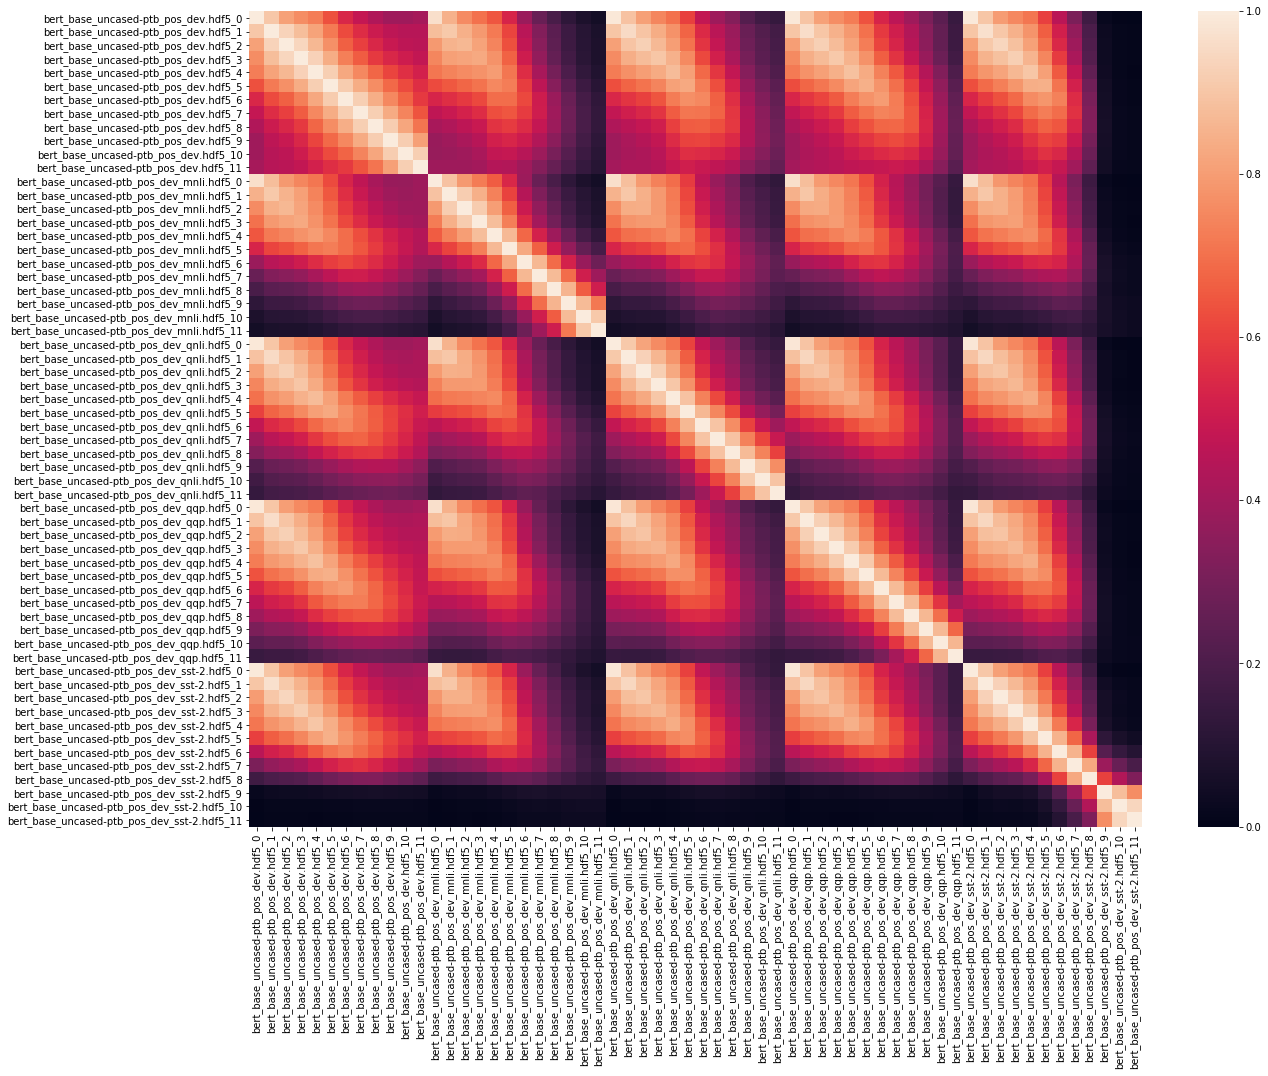

In [21]:
# lincka
sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1)

In [22]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.png".format(fname_prefix, fl)
    try:
        im = plt.imread(fname)
        plt.imshow(im)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        sns.heatmap(df.fillna(1), vmin=0, vmax=1)
        # sns.heatmap(df.fillna(1), )
        plt.savefig(fname, transparent=True)
        plt.show()

In [23]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_fine_pw1_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [24]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_fine_sv1_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [25]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_fine_maxmincorr1_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [26]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_fine_linregcorr1_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [27]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [28]:
# comparing models
# use lincka
model1 = "xlnet"
model2 = "xlnet"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

In [29]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

# Localized vs distributed

In [ ]:
locl_meth = "maxcorr"
dist_meth = "cca"

# Localized and distributed dataframes
locl_df = pd.DataFrame(res_d[locl_meth]['similarities'])
locl_df = locl_df.reindex(locl_df.columns)

dist_df = pd.DataFrame(res_d[dist_meth]['sv_similarities'])
dist_df = dist_df.reindex(dist_df.columns)

# Localization and distributivity statistics
locl_ser = locl_df.mean(axis=1)
locl_ser = (locl_ser - locl_ser.mean()) / locl_ser.std()

dist_ser = dist_df.mean(axis=1)
dist_ser = (dist_ser - dist_ser.mean()) / dist_ser.std()

# diff_ser
diff_ser = locl_ser - dist_ser

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(diff_ser.sort_values())

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(locl_ser.sort_values())

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(dist_ser.sort_values())